Part of the materials in this instruction notebook are adapted from "Introduction to Machine Learning with Python" by Andreas C. Mueller and Sarah Guido

To run the examples in this notebook and to finish your assignment, you need a few Python modules. If you already have a Python installation set up, you can use pip to install all of these packages:

$ pip install numpy matplotlib ipython jupyter scikit-learn pandas graphviz

In your python code, you will always need to import a subset of the following modules. 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz

from IPython.display import display
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz

## The Breast Cancer Dataset

The first dataset that we use in this notebook is included in scikit-learn, a popular machine learning library for Python. The dataset is the Wisconsin Breast Cancer dataset, which records clinical measurements of breast cancer tumors. Each tumor is labeled as “benign” (for harmless tumors) or “malignant” (for cancerous tumors), and the task is to learn to predict whether a tumor is malignant based on the measurements of the tissue.

The data can be loaded using the load_breast_cancer function from scikit-learn:

In [6]:
cancer = load_breast_cancer()
print("cancer.keys(): {}".format(cancer.keys()))

cancer.keys(): dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


Datasets that are included in scikit-learn are usually stored as Bunch objects, which contain some information about the dataset as well as the actual data. All you need to know about Bunch objects is that they behave like dictionaries, with the added benefit that you can access values using a dot (as in bunch.key instead of bunch['key']).

The dataset consists of 569 data points, with 30 features each:

In [7]:
print("Shape of cancer data: {}".format(cancer.data.shape))

Shape of cancer data: (569, 30)


Of these 569 data points, 212 are labeled as malignant and 357 as benign:

In [8]:
print("Sample counts per class:\n{}".format(
      {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

Sample counts per class:
{'malignant': 212, 'benign': 357}


To get a description of the semantic meaning of each feature, we can have a look at the feature_names attribute:

In [9]:
print("Feature names:\n{}".format(cancer.feature_names))

Feature names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Let's print out the names of the features (attributes) and the values in the target (class attribute), and the first 3 instances in the dataset. 

In [10]:
print(cancer.feature_names,cancer.target_names)
for i in range(0,5):
    print(cancer.data[i], cancer.target[i])

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] ['malignant' 'benign']
[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01] 0
[2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.

You can find out more about the data by reading cancer.DESCR if you are interested.

## k-Nearest Neighbor
#### k-Neighbors Classification

Now let’s look at how we can apply the k-nearest neighbors algorithm using scikit-learn. First, we split our data into a training and a test set so we can evaluate generalization performance: 

In [11]:
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

Note that this function randomly partitions the dataset into training and test sets. The randomness is controlled by a pseudo random number generator, which generates random numbers using a seed. If you fix the seed, you will actually always get the same partition (thus no randomness). That is why we set random_state=0. (We can also use any other fixed number instead of 0, to acheive the same effect.) It guarantees that you reproduce the same results in every run. It is useful in testing your programs. However, in your real production code where randomness is needed, you shouldn't fix random_state. 

Next, we instantiate the KNeighborsClassifier class. This is when we can set parameters, like the number of neighbors to use. Here, we set it to 3:

In [12]:
knn = KNeighborsClassifier(n_neighbors=3)

Now, we fit the classifier using the training set. For KNeighborsClassifier this means storing the dataset, so we can compute neighbors during prediction:

In [13]:
knn.fit(train_feature, train_class)

KNeighborsClassifier(n_neighbors=3)

To make predictions on the test data, we call the predict method. For each data point in the test set, this computes its nearest neighbors in the training set and finds the most common class among these:

In [14]:
print("Test set predictions:\n{}".format(knn.predict(test_feature)))

Test set predictions:
[0 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 0 1 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 0 1 0]


To evaluate how well our model generalizes, we can call the score method with the test data together with the test labels:

In [15]:
print("Test set accuracy: {:.3f}".format(knn.score(test_feature, test_class)))

Test set accuracy: 0.916


We see that our model is about 92% accurate, meaning the model predicted the class correctly for 92% of the samples in the test dataset.

#### Analyzing KNeighborsClassifier

Let’s investigate whether we can confirm the connection between model complexity and generalization. For that, we evaluate training and test set performance with different numbers of neighbors. 

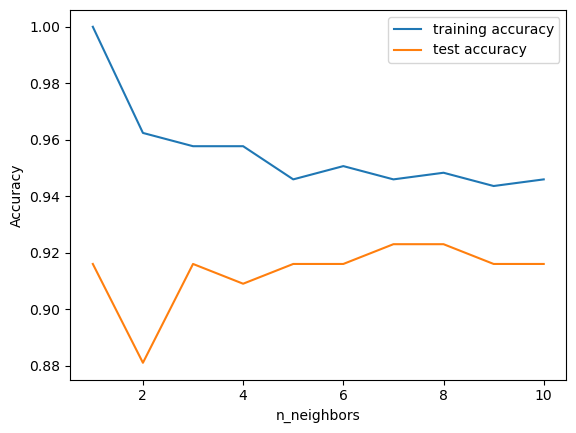

In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10.
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_feature, train_class)
    # record training set accuracy
    training_accuracy.append(knn.score(train_feature, train_class))
    # record generalization accuracy
    test_accuracy.append(knn.score(test_feature, test_class))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.show()

The plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. While real-world plots are rarely very smooth, we can still recognize some of the characteristics of overfitting and underfitting. Considering a single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the model becomes simpler and the training accuracy drops. The test set accuracy for using a single neighbor is lower than when using more neighbors, indicating that using the single nearest neighbor leads to a model that is too complex. On the other hand, when considering 10 neighbors, the model is too simple and performance is even worse. (It is not a typo. Yes, using less neighbors leads to more complex models. Think carefully about this.) The best performance is somewhere in the middle, using around six neighbors. Still, it is good to keep the scale of the plot in mind. The worst performance is around 88% accuracy, which might still be acceptable.

## Linear Support Vector Machines

Linear support vector machines (linear SVMs) is implemented in svm.LinearSVC. Let's apply it on the brest cancer dataset. 

In [17]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

linearsvm = LinearSVC(random_state=0).fit(train_feature, train_class)
print("Test set score: {:.3f}".format(linearsvm.score(test_feature, test_class)))

Test set score: 0.930


C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\rahul\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


## Naive Bayes Classifiers

Naive Bayes classifiers are also implemented in scikit-learn. Since the features in the breast cancer dataset are all continuous numeric attributes, let's use GaussianNB. 

In [18]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=0)

nb = GaussianNB().fit(train_feature, train_class)
print("Training set score: {:.3f}".format(nb.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(nb.score(test_feature, test_class)))

Training set score: 0.946
Test set score: 0.923


## Decision trees

Decision trees are also implmented in scikit-learn. Let's use DecisionTreeClassifier. 

In [19]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 1.000
Test set score: 0.937


If we don’t restrict the depth of a decision tree, the tree can become arbitrarily deep and complex. Unpruned trees are therefore prone to overfitting and not generalizing well to new data. Now let’s apply pre-pruning to the tree, which will stop developing the tree before we perfectly fit to the training data. One option is to stop building the tree after a certain depth has been reached. In the above code, we didn't set max_depth (i.e., max_depth= None,  which is the default value). Nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split instances (min_samples_split is another parameter in DecisionTreeClassifier). Now let's set max_depth=4, meaning only four consecutive questions can be asked. Limiting the depth of the tree decreases overfitting. This leads to a lower accuracy on the training set, but an improvement on the test set:

In [20]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

Training set score: 0.988
Test set score: 0.951


#### Analyzing Decision Trees

We can visualize the tree using the export_graphviz function from the tree module. This writes a file in the .dot file format, which is a text file format for storing graphs. We set an option to color the nodes to reflect the majority class in each node and pass the class and features names so the tree can be properly labeled:

In [21]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
                feature_names=cancer.feature_names, impurity=False, filled=True)

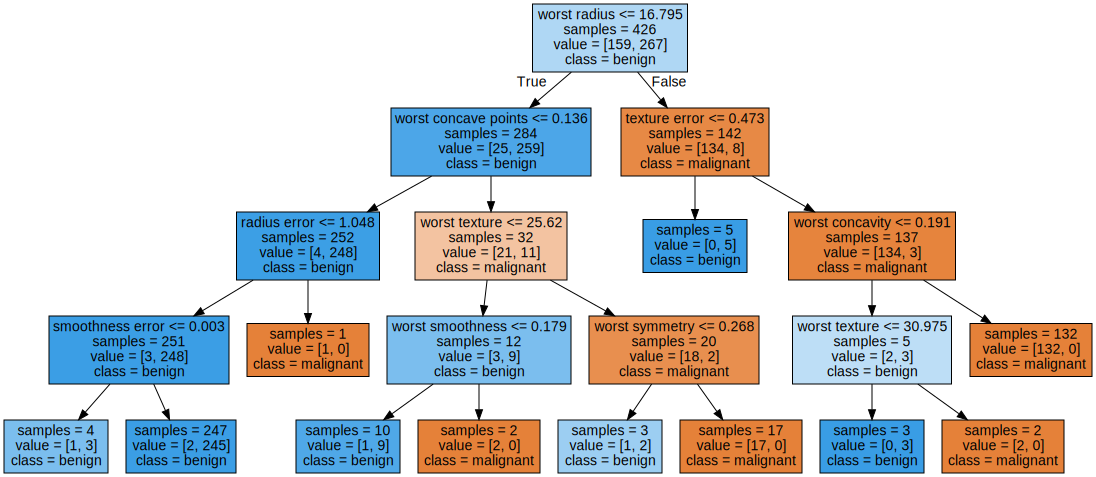

In [23]:
import graphviz
from IPython.display import display

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### Feature Importance in trees

Instead of looking at the whole tree, there are some useful properties that we can derive to summarize the workings of the tree. The most commonly used summary is feature importance, which rates how important each feature is for the decision a tree makes. It is a number between 0 and 1 for each feature, where 0 means “not used at all” and 1 means “perfectly predicts the target.” The feature importances always sum to 1:

In [24]:
feature_importance = tree.feature_importances_
print("Feature importances:\n{}".format(feature_importance))

Feature importances:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


## Model Evaluation

To evaluate our supervised models, so far we have split our dataset into a training set and a test set using the train_test_split function, built a model on the training set by calling the fit method, and evaluated it on the test set using the score method, which for classification computes the fraction of correctly classified samples. 

## Confusion Matrix

scikit-learn has its own function for producing confusion matrix. But, let's use pandas which is a popular Python package for data analysis. Its crosstab function produces a better-looking confusion matrix. 

In [25]:
import pandas as pd

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
train_feature, test_feature, train_class, test_class = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(train_feature, train_class)
print("Training set score: {:.3f}".format(tree.score(train_feature, train_class)))
print("Test set score: {:.3f}".format(tree.score(test_feature, test_class)))

prediction = tree.predict(test_feature)
print("Confusion matrix:")
print(pd.crosstab(test_class, prediction, rownames=['True'], colnames=['Predicted'], margins=True))

Training set score: 0.988
Test set score: 0.951
Confusion matrix:
Predicted   0   1  All
True                  
0          49   4   53
1           3  87   90
All        52  91  143


## Cross-Validation

The reason we split our data into training and test sets is that we are interested in measuring how well our model generalizes to new, previously unseen data. We are not interested in how well our model fit the training set, but rather in how well it can make predictions for data that was not observed during training.
 
Cross-validation is a statistical method of evaluating generalization performance that is more stable and thorough than using a split into a training and a test set. Cross-validation is implemented in scikit-learn using the cross_val_score function from the model_selection module. The parameters of the cross_val_score function are the model we want to evaluate, the training data, and the ground-truth labels. Let’s evaluate DecisionTreeClassifier on the breast cancer dataset. We can control the number of folds used by setting the cv parameter. We also summarize the cross-validation accuracy by computing the mean accuracy of the multiple folds. 

scikit-learn uses stratified k-fold cross-validation for classification. In stratified cross-validation, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset. 

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
scores = cross_val_score(tree, cancer.data, cancer.target, cv=5)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.3f}".format(scores.mean()))

Cross-validation scores: [0.92105263 0.88596491 0.93859649 0.92982456 0.90265487]
Average cross-validation score: 0.916


## Programming Assignment

#### Dataset and Sample Code

In this assignment, you are given NBA Player Stats for regular season (https://www.basketball-reference.com/leagues/NBA_2023_per_game.html)
Your task is to classify NBA players into 5 positions on the basketball court: SG (shooting guard), PG (point guard), SF (small forward), PF (power forward), and C (center). You make the classification based on the players' per-game average performance in a regular season. The dataset is in a CSV file "nba_stats.csv" that is provided to you. For loading CSV file and processing the data, we suggest you to use pandas. You may use anything from the previous examples given to you.

#### Tasks

Your tasks are as follows. In your code, set the random_state to 0. 

1) (40 points) Use one classification method (for example : Decision Tree/Naive Bayes/KNN/SVM/Neural-Networks) on the dataset. You can apply any of the methods explained in this instruction notebook or any other method in scikit-learn. You can also implement your own method. You can tune your model by using any combination of parameter values. Use 80% of the data for training and the rest for validation. Print out the training and validation set accuracy of the model. Also, print out the confusion matrix for both training and validation sets.

2) (20 points) Your TA will test your model on a test set(~100 sample) and you'll have access to this file after your submission deadline. For now, you're given an example test set as "dummy_test.csv", apply your model in 1 to the dummy test set and print the accuracy and confusion matrix on dummy test set.

3) (40 points) Use the same model with the same parameters you have chosen in 1). However, instead of using 80%/20% train/test split, apply 10-fold stratified cross-validation. Print out the accuracy of each fold. Print out the average accuracy across all the folds. 

#### Canvas Submission
You should submit a single .py file (your code that shows the output for tasks 1-3)

#### Grading and Tips

For this assignment, the most important thing is to carefully read the instruction notebook and play with the code snippets. Once you understand the instructions and the code snippets, it won't be difficult to finish the tasks. 

Below are some thoughts on what might lead to better accuracy. Note that we haven't tried all these ideas. There is no promise they will help you. 

1) The features may not be all equally important. For instance, is 'Age' important for this classification task? Some of the features are redundant. For instance, field goal percentage (FG%) is defined by field goals made (FG) and field goal attempts (FGA): FG% = FG / FGA. It may not be beneficial to include all of them. 

Some domain knowledge might help you in choosing the features. To understand basketball stats, you can click "Glossary" on this page: https://www.basketball-reference.com/leagues/NBA_2021_per_game.html. You can read more about basketball stats: https://en.wikipedia.org/wiki/Basketball_statistics. 

Of course, it might be possible to devise a way to automatically choose features. 

2) It might be helpful to understand the classes, i.e., the 5 positions on court. You can read https://en.wikipedia.org/wiki/Basketball_positions. For instance, SG and PG players are more likely to have similar stats; PF and C can be also similar; some SFs are similar to SG/PG and some other SFs are similar to PF.  

3) The original dataset has NULL values. For instance, if a player has never attempted a 3-pointer shot (i.e., 3PA=0), then of course he didn't make any 3-pointer shot either (i.e., 3P=0). The value of "3P%" was left blank in the original dataset. We replaced it by 0. Knowing this might be helpful. Similarly there can be NULL values in FG%, FT%, and so on. 

4) Keep in mind that stats of players with limited minutes played are less indicative of their true characteristics. You can expect your model to make more mistakes on bench players. For the same reason, we don't expect you to develop some model with 90% accuracy. (But who knows. You are excellent and maybe you can exceed the expectation.) 

5) If your method relies on a distance measure, you may consider writing your own distance function, based on your understanding of the data. For instance, KNeighborsClassifier allows you to call your own distance function. 

6) To figure out what parameters are available in the various classification methods, you can read more about the specifications of the corresponding Python classes: 

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier

http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB

http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

You can even read the following tutorials about these methods. 

http://scikit-learn.org/stable/modules/neighbors.html

http://scikit-learn.org/stable/modules/naive_bayes.html

http://scikit-learn.org/stable/modules/svm.html

http://scikit-learn.org/stable/modules/tree.html